In [1]:
# Dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import vlsvtools
import vdfplot

# Bokeh dependencies
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure

from bokeh.core.enums import MarkerType
from bokeh.io import curdoc, show
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Scatter, MultiChoice, Select
from bokeh.transform import factor_cmap
from bokeh.models import HoverTool
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.models.widgets import Panel, Tabs

from bokeh.palettes import Category10 

output_notebook()

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.4.3


Loading BokehJS ...

In [2]:
# Load file that we want to visualize
CSVFILE = 'output/2D_magnetosphere.csv'
df = pd.read_csv(CSVFILE)
df.head()

,fileid,cellid,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,s0_zeros,...,m1_velocity_1,m1_velocity_2,m1_speed,m2_pressure_diag_0,m2_pressure_diag_1,m2_pressure_diag_2,m2_pressure_offdiag_0,m2_pressure_offdiag_1,m2_pressure_offdiag_2,pngfile
0,4000,1,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-8731.902678,-112284.795215,674596.850257,1.895125e-11,7.030782e-12,2.799146e-11,1.639938e-12,-1.593959e-11,-1.239553e-12,f0004000c00001.png
1,4000,51,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-12474.213421,-102164.041571,661392.831394,2.253224e-11,7.163521e-12,2.436122e-11,2.131616e-12,-1.651819e-11,-2.016868e-12,f0004000c00051.png
2,4000,101,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,5109.309672,-83953.042759,654079.048461,2.408455e-11,6.946915e-12,1.869208e-11,-7.174578e-13,-1.423191e-11,8.661420e-13,f0004000c00101.png
3,4000,151,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-1420.979407,-78224.256662,647937.343266,2.598282e-11,6.906629e-12,1.713808e-11,1.859203e-13,-1.397412e-11,-2.538464e-13,f0004000c00151.png
4,4000,201,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-5737.249175,-90500.950855,646050.243667,2.726940e-11,6.958308e-12,2.060273e-11,8.684695e-13,-1.670346e-11,-1.058905e-12,f0004000c00201.png


In [3]:
# Function that can prepare the data from CSV to DataFrame

def csv_data_to_bokeh(csv_file, n_classes, cols, pca_transform=False, pca_variance=0.9):
    df = pd.read_csv(csv_file)
    if pca_transform:
        X = df.drop(["fileid", "cellid", "spatial_x", "spatial_y", "spatial_z", "pngfile"], axis=1)
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=pca_variance)
        pca_res = pca.fit_transform(X)
        kmeans = KMeans(n_clusters=n_classes).fit(pca_res)
    else:
        kmeans = KMeans(n_clusters=n_classes).fit(df[cols].values)
    kmeans_df = pd.DataFrame(df[['fileid', 'cellid', 'spatial_x', 'spatial_y', 'spatial_z', 'pngfile']])
    kmeans_df.insert(2, 'class', kmeans.labels_)

    # Transform classes to strings as Bokeh wants them as strings
    kmeans_df['class'] = ['class_'+str(i) for i in kmeans_df['class']]

    return(kmeans_df)




# Data variables, initial values, etc.
csv_file = 'output/2D_magnetosphere.csv'
n_classes = 6
cols = ['gap', 'mean', 'zeros', 'partials']
pca_transform = False
pca_variance = 0.9

# Initialize the data
kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols)
kmeans_df_2D

,fileid,cellid,class,spatial_x,spatial_y,spatial_z,pngfile
0,4000,1,class_0,-599850000.0,0.0,-359850000.0,f0004000c00001.png
1,4000,51,class_0,-584850000.0,0.0,-359850000.0,f0004000c00051.png
2,4000,101,class_0,-569850000.0,0.0,-359850000.0,f0004000c00101.png
3,4000,151,class_0,-554850000.0,0.0,-359850000.0,f0004000c00151.png
4,4000,201,class_0,-539850000.0,0.0,-359850000.0,f0004000c00201.png
...,...,...,...,...,...,...,...
2866,4000,7052751,class_0,225150000.0,0.0,345150000.0,f0004000c7052751.png
2867,4000,7052801,class_0,240150000.0,0.0,345150000.0,f0004000c7052801.png
2868,4000,7052851,class_0,255150000.0,0.0,345150000.0,f0004000c7052851.png
2869,4000,7052901,class_0,270150000.0,0.0,345150000.0,f0004000c7052901.png


In [10]:
# Helpful guide to make interactive Jupyter notebooks:
# https://stackoverflow.com/questions/53217654/how-to-get-interactive-bokeh-in-jupyter-notebook

# Visual options for chart
width = 840
height = 600
circle_size = 12


# Initialize data
kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols)
source = ColumnDataSource(data=kmeans_df_2D)

# Possible options for K-means
COLS_OPTIONS = [
    'mean',
    'zeros',
    'partials', 'gap', 
    'spatial_x',
    'spatial_y',
    'spatial_z', 
    'm0_density', 
    'm1_velocity_0', 
    'm1_velocity_1', 
    'm1_velocity_2', 
    'm1_speed', 
    'm2_pressure_diag_0', 
    'm2_pressure_diag_1', 
    'm2_pressure_diag_2', 
    'm2_pressure_offdiag_0', 
    'm2_pressure_offdiag_1', 
    'm2_pressure_offdiag_2',
    's10_min',
    's10_max','s10_mean',
    's10_median',
    's10_var',
    's10_skew',
    's10_kurt',
    's10_zeros'
]

# Create color map for classes
index_cmap = factor_cmap('class', palette=list(Category10[10]),factors=sorted(kmeans_df_2D['class'].unique()))

# Create hover tooltip for single cell
hover = HoverTool(
    tooltips="""
    <div>
        <img
            src="output/2D_magnetosphere/images/smallblob/@pngfile" alt="@cellid"
            style="margin: 0px 0px 10px 0px; border: 1px solid #000; width: 100px; height: 100px;"
        />
        <div style="font-size: 15px; font-weight: bold;">@cellid</div>
        <div style="font-size: 13px; color: #696;">($x, $y)</div>
    </div>
    """
)

# Initialize our plot
p = figure(title = "2D Magnetosphere",  width=width,  height=height, tools=[hover])

# Render the data to scatter plot
p.circle(
    'spatial_x', # X coordinate
    'spatial_z', # Y coordinate
    source=source,
    fill_alpha=1, 
    size=circle_size, 
    fill_color=index_cmap, 
    line_width=0
)

# Add all the sliders and options to the plot

def update_n_classes(attrname, old, new):
    n_classes = new
    kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols)
    source.data = kmeans_df_2D

def update_cols(attrname, old, new):
    if len(new) > 0:
        cols = new
        kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols, pca_transform=pca_transform, pca_variance=pca_variance)
        source.data = kmeans_df_2D
    else:
        print("Value change ignored: at least one column needs to be selected!")

def update_pca_transform(attrname, old, new):
    pca_transform = True if new == "ON" else False 
    kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols, pca_transform=pca_transform, pca_variance=pca_variance)
    source.data = kmeans_df_2D

def update_pca_variance(attrname, old, new):
    if new > 0:
        pca_variance = new
        kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols, pca_transform=pca_transform, pca_variance=pca_variance)
        source.data = kmeans_df_2D
    else:
        print("Value change ignored: variance can't be zero!")

def update_pca_transform(attr, old, new):
    if tabs.active == 1:
        pca_transform = True
    else:
        pca_transform = False
    
    kmeans_df_2D = csv_data_to_bokeh(csv_file, n_classes, cols, pca_transform=pca_transform, pca_variance=pca_variance)
    source.data = kmeans_df_2D

class_slider = Slider(start=1, end=10, value=5, step=1, title="Number of classes")
multi_choice = MultiChoice(value=cols, options=COLS_OPTIONS, title="Selected columns")
pca_slider = Slider(start=0.0, end=1.0, value=pca_variance, step=0.05, title="Explained variance by PCs")

class_slider.on_change('value', update_n_classes)
multi_choice.on_change('value', update_cols)
pca_slider.on_change('value', update_pca_variance)

# Make PCA transform it's own tab
tab_orig = Panel(child=column(multi_choice), title="Original")
tab_pca = Panel(child=column(pca_slider), title="PCA Transform")
tabs_magnetosphere = Tabs(tabs=[ tab_orig, tab_pca ])

tabs_magnetosphere.on_change('active', update_pca_transform)




layout = row(p, column(class_slider, tabs_magnetosphere))

def modify_doc(doc):
    doc.add_root(row(layout, width=900))

handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)


In [5]:

# Data loading for spatial progression graph
SPATIAL_CSVFILE = 'output/1D_shock_perpendicular.csv'
n_classes_1D = 6
cols_1D = ['gap', 'mean', 'zeros', 'partials']

# Possible options for K-means
COLS_OPTIONS_1D = [
    'mean',
    'zeros',
    'partials', 'gap', 
    'spatial_x',
    'spatial_y',
    'spatial_z', 
    'm0_density', 
    'm1_velocity_0', 
    'm1_velocity_1', 
    'm1_velocity_2', 
    'm1_speed', 
    'm2_pressure_diag_0', 
    'm2_pressure_diag_1', 
    'm2_pressure_diag_2', 
    'm2_pressure_offdiag_0', 
    'm2_pressure_offdiag_1', 
    'm2_pressure_offdiag_2',
    's10_min',
    's10_max','s10_mean',
    's10_median',
    's10_var',
    's10_skew',
    's10_kurt',
    's10_zeros'
]

# Function that can prepare the data from CSV to DataFrame for spatial progression
def csv_data_to_spatial_bokeh(csv_file, n_classes_1D, cols_1D):
    df = pd.read_csv(SPATIAL_CSVFILE)
    kmeans_1D = KMeans(n_clusters=n_classes_1D).fit(df[cols_1D].values)

    kmeans_df_1D = pd.DataFrame(df[['fileid', 'cellid', 'spatial_x', 'spatial_y', 'spatial_z', 'pngfile']])
    kmeans_df_1D.insert(2, 'class', kmeans_1D.labels_)

    # Transform classes to strings as Bokeh wants them as strings
    kmeans_df_1D['class'] = ['class_'+str(i) for i in kmeans_df_1D['class']]

    return(kmeans_df_1D)

# Initialize the data
kmeans_df_1D = csv_data_to_spatial_bokeh(SPATIAL_CSVFILE, n_classes_1D, cols_1D)
dataset = vlsvtools.VLSVdataset('1D_shock_perpendicular')
rhos = dataset.get_rhos()


def get_lines_for_1D():
    arr = []
    for i in range(16):
        x = rhos[i][:,0]
        rho = rhos[i][:,3]
        y = (rho-1e6) / (rho.max()-1e6) - (i) - 1
        # Draw black line on top of the balls
        # ax2.plot(x, y, color='black', lw=1, alpha=0.8)

        arr.append([x,y])
    return(arr)


INFO:vlsvtools:Found 16 files.
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000000.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000001.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000002.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000003.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000004.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000005.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000006.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in 1D_shock_perpendicular\bulk.0000007.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200

In [11]:

# Visual options for chart
width_1D = 840
height_1D = 800
circle_size_1D = 10


# Create hover tooltip for single cell
hover = HoverTool(names=['ball'],
    tooltips="""
    <div>
        <img
            src="output/1D_shock_perpendicular/images/smallblob/@pngfile" alt="@cellid"
            style="margin: 0px 0px 10px 0px; border: 1px solid #000; width: 100px; height: 100px;"
        />
        <div style="font-size: 15px; font-weight: bold;">@cellid</div>
        <div style="font-size: 13px; color: #696;">($x, $y)</div>
    </div>
    """
)

p = figure(title = "Spatial progression of 1D data", width=width_1D, height=height_1D, tools=[hover])
p.y_range.flipped = True

source_1D = ColumnDataSource(data=kmeans_df_1D)
index_cmap_1D = factor_cmap('class', palette=list(Category10[10]),factors=sorted(kmeans_df_1D['class'].unique()))

# Print overlay lines to plot
lines = get_lines_for_1D()
for line in lines:
    x = line[0]
    y = line[1] * -1
    p.line(x, y, line_width=1, line_color="black")

# Draw balls
p.circle(
    'spatial_x', # X coordinate
    'fileid', # Y coordinate
    source=source_1D,
    fill_alpha=0.75, 
    size=circle_size_1D, 
    fill_color=index_cmap_1D, 
    line_width=0,
    name='ball'
)

# Define sliders etc.
def update_1D_cols(attrname, old, new):
    if len(new) > 0:
        cols_1D = new
        kmeans_df_1D = csv_data_to_spatial_bokeh(SPATIAL_CSVFILE, n_classes_1D=n_classes_1D, cols_1D=cols_1D)
        source_1D.data = kmeans_df_1D
    else:
        print("Value change ignored: at least one column needs to be selected!")

col_selector_1D = MultiChoice(value=cols_1D, options=COLS_OPTIONS_1D, title="Selected columns")
col_selector_1D.on_change('value', update_1D_cols)

def update_n_classes_1D(attrname, old, new):
    n_classes_1D = new
    kmeans_df_1D = csv_data_to_spatial_bokeh(SPATIAL_CSVFILE, n_classes_1D=n_classes_1D, cols_1D=cols_1D)
    source_1D.data = kmeans_df_1D

class_slider = Slider(start=1, end=10, value=5, step=1, title="Number of classes")
class_slider.on_change('value', update_n_classes_1D)

layout = row(p, column(class_slider, col_selector_1D))

def modify_doc(doc):
    doc.add_root(row(layout, width=900))

handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)


### 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0     class_0
1     class_0
2     class_0
3     class_0
4     class_0
5     class_0
6     class_0
7     class_0
8     class_0
9     class_0
10    class_0
11    class_0
12    class_0
13    class_0
14    class_0
15    class_0
16    class_0
17    class_0
18    class_0
19    class_0
20    class_0
21    class_0
22    class_0
23    class_0
24    class_0
25    class_0
26    class_0
27    class_0
28    class_0
29    class_0
30    class_0
31    class_0
32    class_0
33    class_0
34    class_0
35    class_0
36    class_0
37    class_0
38    class_0
39    class_0
40    class_3
41    class_3
42    class_3
43    class_3
44    class_3
45    class_3
46    class_3
47    class_3
Name: class, dtype: object

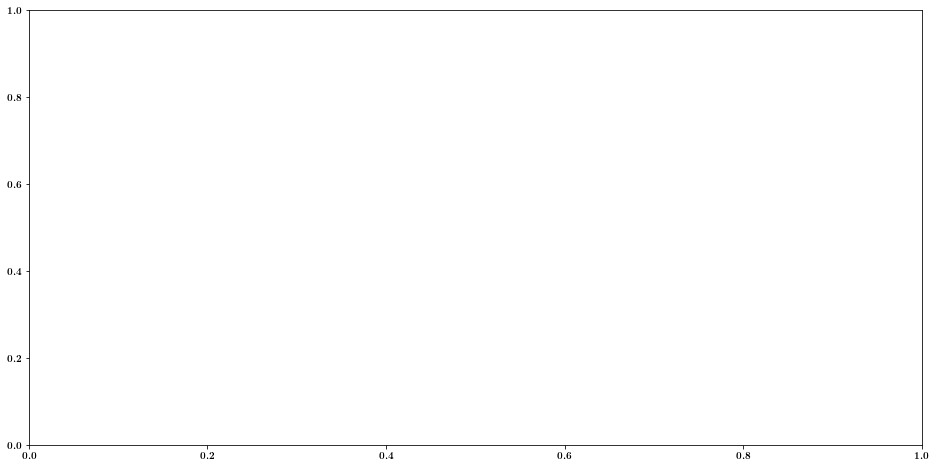

In [9]:

cmap = mpl.colors.ListedColormap(['darkgoldenrod', 'slateblue', 'limegreen', 'darkgreen', 'cadetblue', 'orangered'])
norm = mpl.colors.BoundaryNorm(np.arange(7)-0.5, cmap.N)

fig, ax = plt.subplots(figsize=(16, 8))
for t_idx in range(16):
    snapshot = kmeans_df_1D[kmeans_df_1D['fileid'] == t_idx]
    # Draw balls
    s = ax.scatter(snapshot['spatial_x'], [-t_idx]*len(snapshot), c=snapshot['class'], s=80, cmap=cmap, norm=norm)
    if t_idx == 12:
        legend_handles = s.legend_elements()[0]
ax.set_yticks(range(-15, 1))
ax.set_yticklabels(range(15, -1, -1))
ax.set_ylabel('Time')
ax.set_xlabel('x')

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.axes.yaxis.set_visible(False)

for i in range(16):
    x = rhos[i][:,0]
    rho = rhos[i][:,3]
    # Draw black line on top of the balls
    ax2.plot(x, (rho-1e6) / (rho.max()-1e6) - (i) - 1, color='black', lw=1, alpha=0.8)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.legend(handles=legend_handles, 
           labels=['0', '1', '2', '3', '4', '5'],
           loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.suptitle('Spatial progression, 6-class k-means')
plt.show()